In [47]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\LE HOANG NHAN\PycharmProjects\pandas- Sunlight in Austin data
['.idea', 'NOAA_QCLCD_2011_hourly_13904.txt', 'Sunlight in Austin.ipynb', 'venv', 'weather_data_austin_2010.csv']


In [49]:
data_file = 'NOAA_QCLCD_2011_hourly_13904.txt'
# Read in the data file: df
df = pd.read_csv(data_file, header = None)

# Print the output of df.head()
print(df.head())

# Read in the data file with header=None: df_headers
df_headers = pd.read_csv(data_file, header=None)

# Print the output of df_headers.head()
print(df_headers.head())

      0         1    2   3       4  5      6  7  8  9   ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00           ...          29.95      
1  13904  20110101  153  12  OVC049     10.00           ...          30.01      
2  13904  20110101  253  12  OVC060     10.00           ...  030     30.01      
3  13904  20110101  353  12  OVC065     10.00           ...          30.03      
4  13904  20110101  453  12  BKN070     10.00           ...          30.04      

   38 39 40 41     42 43  
0  AA           29.95     
1  AA           30.02     
2  AA           30.02     
3  AA           30.04     
4  AA           30.04     

[5 rows x 44 columns]
      0         1    2   3       4  5      6  7  8  9   ...   34 35     36 37  \
0  13904  20110101   53  12  OVC045     10.00           ...          29.95      
1  13904  20110101  153  12  OVC049     10.00           ...          30.01      
2  13904  20110101  253  12  OVC060     10.00           ...  030     30.01      
3  1

In [52]:
#Re-assigning column names
column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

# Split on the comma to create a list: column_labels_list
column_labels_list = column_labels.split(',')

# Assign the new column labels to the DataFrame: df.columns
df.columns = column_labels_list

# Remove the appropriate columns: df_dropped
df_dropped = df.drop(list_to_drop,axis='columns')

# Print the output of df_dropped.head()
print(df_dropped.head())

    Wban      date  Time  StationType sky_condition visibility dry_bulb_faren  \
0  13904  20110101    53           12        OVC045      10.00             51   
1  13904  20110101   153           12        OVC049      10.00             51   
2  13904  20110101   253           12        OVC060      10.00             51   
3  13904  20110101   353           12        OVC065      10.00             50   
4  13904  20110101   453           12        BKN070      10.00             50   

  dry_bulb_cel wet_bulb_faren wet_bulb_cel dew_point_faren dew_point_cel  \
0         10.6             38          3.1              15          -9.4   
1         10.6             37          3.0              14         -10.0   
2         10.6             37          2.9              13         -10.6   
3         10.0             38          3.1              17          -8.3   
4         10.0             37          2.8              15          -9.4   

  relative_humidity wind_speed wind_direction station_pr

In [54]:
#Cleaning and tidying datetime data

# Convert the date column to string: df_dropped['date']
df_dropped['date'] = df_dropped["date"].astype(str)

# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))

# Concatenate the new date and Time columns: date_string
date_string = df_dropped['date']+df_dropped['Time'].astype(str)

# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df_dropped.set_index(date_times)

# Print the output of df_clean.head()
print(df_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [56]:
#Cleaning the numeric columns

# Read in the data file: df
df = pd.read_csv(data_file, header = None)

# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc["2011-06-20 08:00:00":"2011-06-20 09:00:00", 'dry_bulb_faren'])

# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors='coerce')

# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(df_clean.loc["2011-06-20 08:00:00":"2011-06-20 09:00:00", 'dry_bulb_faren'])

# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [58]:
#Signal min, max, median

# Print the median of the dry_bulb_faren column
print(df_clean.dry_bulb_faren.median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', "dry_bulb_faren"].median())

72.0
78.0
48.0


In [60]:
# Read in the data file: df
df_climate = pd.read_csv('weather_data_austin_2010.csv', delimiter=',')
df_climate= df_climate.set_index(pd.DatetimeIndex(df_climate['Date']))

In [61]:
#Signal variance

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample("D").mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011["dry_bulb_faren"].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample("D").mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056477


In [68]:
#compare temperatures on sunny days against temperatures on overcast days

# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'

# Filter df_clean using is_sky_clear
sunny = df_clean.loc[is_sky_clear]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()

# See the result
sunny_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08


In [71]:
#Daily hours of clear sky

# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition'] == 'CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# See the result
resampled

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

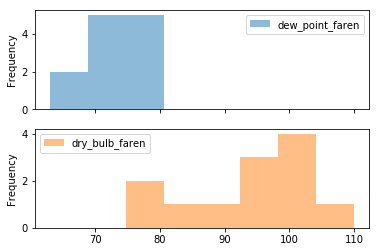

In [72]:
#Heat or humidity

# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = df_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind="hist", bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

95.3


C:\Users\LE HOANG NHAN\PycharmProjects\pandas- Sunlight in Austin data\venv\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


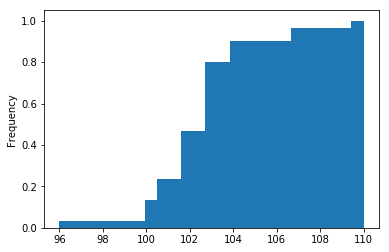

In [73]:
#Probability of high temperatures

# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.loc['2010-Aug','Temperature'].max()
print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = df_clean.loc['2011-Aug','dry_bulb_faren'].resample("D").max()


# Filter for days in august_2011 where the value exceeds august_max: august_2011_high

august_2011_high = august_2011.loc[august_2011>august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind="hist", normed=True,  cumulative =True,bins =25)

# Display the plot
plt.show()